In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/6G_IoT_Beamforming_Dataset.csv')
print(df)

     Obstacle Density  Mobility (m/s)  Frequency (GHz)  Transmit Power (dBm)  \
0                   6        2.612250               60             34.668228   
1                   1        1.335916               60             16.784149   
2                   9        1.544452              150             12.464573   
3                   1        1.077700               28             30.732856   
4                   5        1.778853               28             27.666888   
..                ...             ...              ...                   ...   
995                 5        1.956875              100             28.076791   
996                 5        2.536813               60             29.316775   
997                 6        2.077478              150             27.872488   
998                 9        1.289793               60             24.474441   
999                 6        2.018900              100             10.365225   

     Number of Antennas  Codebook Size 

In [ ]:
df.describe()

,Obstacle Density,Mobility (m/s),Frequency (GHz),Transmit Power (dBm),Number of Antennas,Codebook Size,Bandwidth (MHz),Interference Level (dB),SIFT Keypoints,Beamforming Gain (dB),Latency (ms),Energy Consumption (kWh/Gb),Throughput (Mbps),Beam Training Time (s),SNR Improvement (dB),Processing Time (ms),Memory Usage (MB),Optimized
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.91700,1.496156,84.706000,22.160088,233.728000,120.288000,179.85000,-74.935147,297.557000,17.580803,5.428868,0.030173,541.145590,0.106612,12.593778,2.968268,318.311000,0.168000
std,2.60824,0.862474,45.165933,7.220046,168.696083,86.590848,131.27723,14.161434,114.304699,4.405323,2.549463,0.011362,261.051303,0.054906,4.298142,1.156131,110.761746,0.374053
min,1.00000,0.004695,28.000000,10.004663,64.000000,32.000000,50.00000,-99.936596,100.000000,10.020333,1.024311,0.010007,100.978318,0.010250,5.001780,1.000963,128.000000,0.000000
25%,3.00000,0.748015,60.000000,15.966076,112.000000,64.000000,50.00000,-86.720451,193.000000,13.914243,3.253923,0.020987,326.967043,0.058808,8.826940,1.960234,220.000000,0.000000
50%,5.00000,1.532466,100.000000,21.981794,128.000000,64.000000,100.00000,-74.565603,299.000000,17.476982,5.508015,0.030034,533.732207,0.108614,12.830408,2.970815,318.500000,0.000000
75%,7.00000,2.212357,100.000000,28.362225,256.000000,256.000000,200.00000,-63.332604,392.000000,21.440149,7.542314,0.039672,768.768609,0.153884,16.194114,3.967252,411.000000,0.000000
max,9.00000,2.998241,150.000000,34.940571,512.000000,256.000000,400.00000,-50.007538,499.000000,24.996119,9.995467,0.049975,999.672063,0.199827,19.997251,4.999571,511.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Obstacle Density,0
Mobility (m/s),0
Frequency (GHz),0
Transmit Power (dBm),0
Number of Antennas,0
Codebook Size,0
Bandwidth (MHz),0
Interference Level (dB),0
SIFT Keypoints,0
Beamforming Gain (dB),0


In [ ]:
X = df.drop(columns=['Optimized'])
y = df['Optimized']

In [ ]:
# Define which input features are categorical
categorical_features = [
    "Environment_Outdoor",
    "Device Type_IoT Sensor",
    "Device Type_Smartphone"
]

# All input feature columns
all_features = X.columns.tolist()

# Derive numerical features by excluding categorical ones
numerical_features = [f for f in all_features if f not in categorical_features]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import sklearn

# Check scikit-learn version
sk_version = sklearn.__version__
print("scikit-learn version:", sk_version)

# === Step 1: Define your input DataFrame 'X' ===
# (Assume X is already defined before this code)

# Separate categorical and numerical features
categorical_features = [
    "Environment_Outdoor",
    "Device Type_IoT Sensor",
    "Device Type_Smartphone"
]

numerical_features = [col for col in X.columns if col not in categorical_features]

# === Step 2: MinMax Scale Numerical Features ===
scaler = MinMaxScaler()
X_numerical_scaled = pd.DataFrame(
    scaler.fit_transform(X[numerical_features]),
    columns=numerical_features,
    index=X.index
)

# === Step 3: One-Hot Encode Categorical Features ===
# Use correct param based on sklearn version
if sk_version >= '1.2':
    encoder = OneHotEncoder(sparse_output=False, drop=None)
else:
    encoder = OneHotEncoder(sparse=False, drop=None)

X_categorical_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
X_categorical_encoded_df = pd.DataFrame(
    X_categorical_encoded,
    columns=encoded_feature_names,
    index=X.index
)

# === Step 4: Combine the Processed Features ===
X_processed = pd.concat([X_numerical_scaled, X_categorical_encoded_df], axis=1)

# === Step 5: (Optional) Print the result ===
print("X_processed shape:", X_processed.shape)
print(X_processed.head())

scikit-learn version: 1.6.1
X_processed shape: (1000, 23)
   Obstacle Density  Mobility (m/s)  Frequency (GHz)  Transmit Power (dBm)  \
0             0.625        0.871059         0.262295              0.989078   
1             0.000        0.444697         0.262295              0.271876   
2             1.000        0.514359         1.000000              0.098649   
3             0.000        0.358439         0.000000              0.831259   
4             0.500        0.592661         0.000000              0.708305   

   Number of Antennas  Codebook Size  Bandwidth (MHz)  \
0            0.000000       0.000000         0.000000   
1            0.000000       0.428571         0.428571   
2            0.428571       1.000000         0.142857   
3            0.428571       0.000000         0.142857   
4            1.000000       0.142857         0.000000   

   Interference Level (dB)  SIFT Keypoints  Beamforming Gain (dB)  ...  \
0                 0.452642        0.220551              

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to "Optimized" column
y = label_encoder.fit_transform(y)
print(y.shape)

(1000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y  # stratify helps with imbalanced classes
)


🔍 Running GridSearchCV for Random Forest...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classification Results:
  ✅ Accuracy: 0.9900
  ✅ F1 Score: 0.9697
  📈 CV Accuracy Mean: 0.9863
  📈 CV Accuracy Std: 0.0087
  🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       166
           1       1.00      0.94      0.97        34

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200



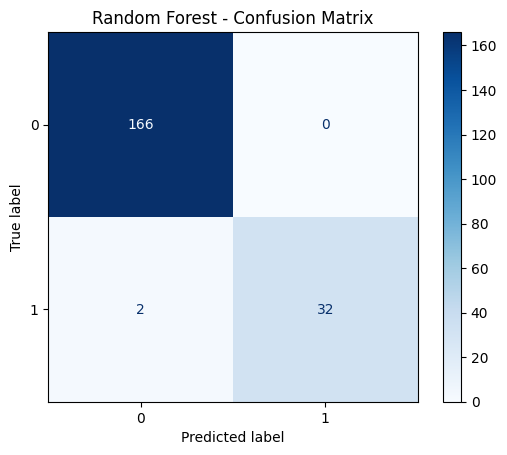

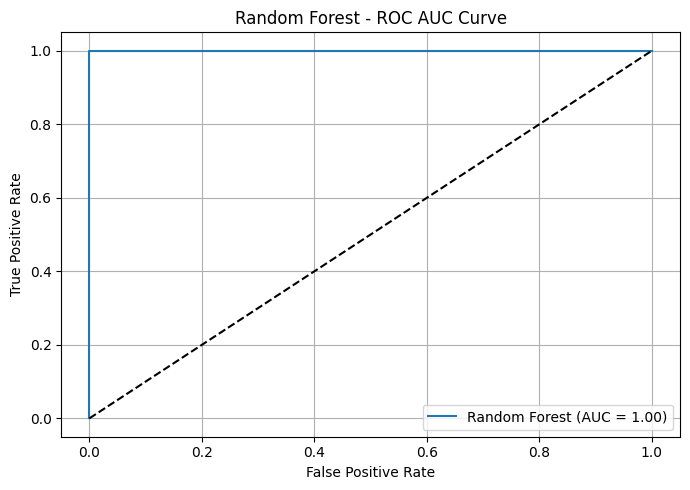


🔍 Running GridSearchCV for KNN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNN Classification Results:
  ✅ Accuracy: 0.8450
  ✅ F1 Score: 0.3404
  📈 CV Accuracy Mean: 0.8337
  📈 CV Accuracy Std: 0.0336
  🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       166
           1       0.62      0.24      0.34        34

    accuracy                           0.84       200
   macro avg       0.74      0.60      0.63       200
weighted avg       0.82      0.84      0.81       200



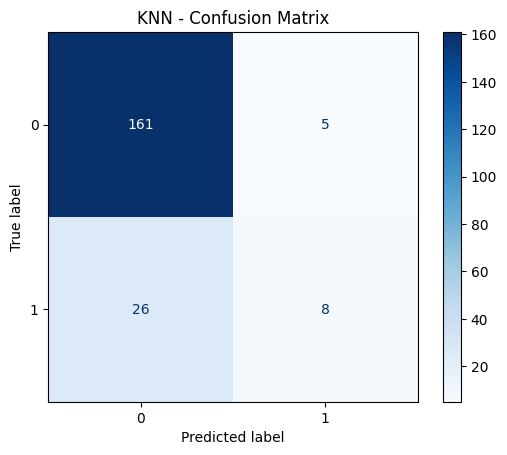

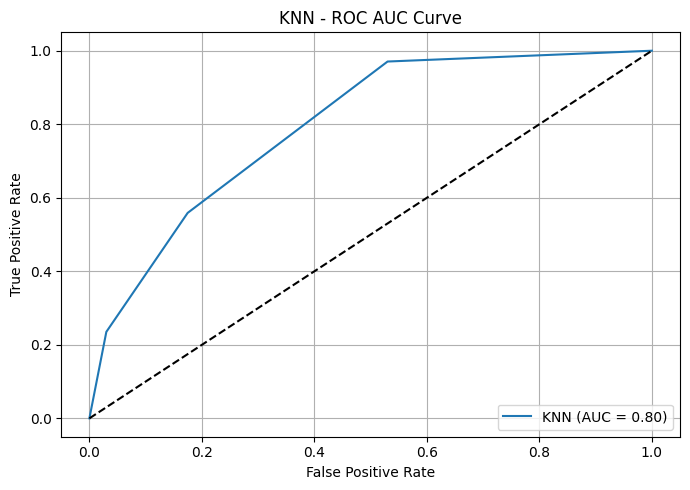


🔍 Running GridSearchCV for Gradient Boost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boost Classification Results:
  ✅ Accuracy: 1.0000
  ✅ F1 Score: 1.0000
  📈 CV Accuracy Mean: 0.9988
  📈 CV Accuracy Std: 0.0037
  🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        34

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



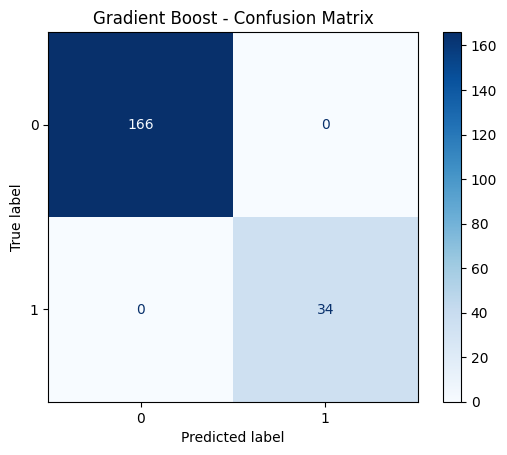

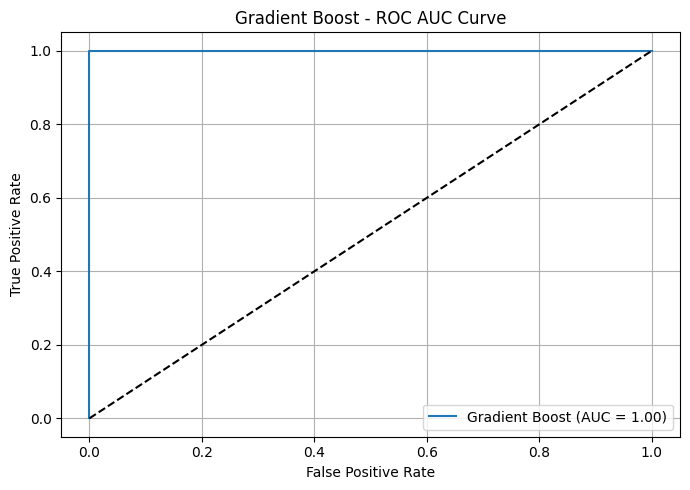


🔍 Running GridSearchCV for Extra Trees...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Extra Trees Classification Results:
  ✅ Accuracy: 0.9000
  ✅ F1 Score: 0.5833
  📈 CV Accuracy Mean: 0.8737
  📈 CV Accuracy Std: 0.0181
  🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       166
           1       1.00      0.41      0.58        34

    accuracy                           0.90       200
   macro avg       0.95      0.71      0.76       200
weighted avg       0.91      0.90      0.88       200



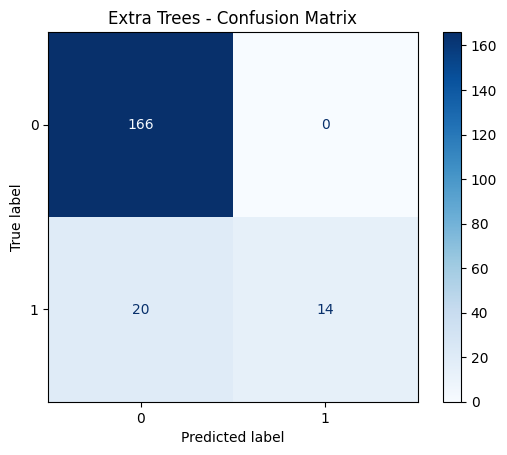

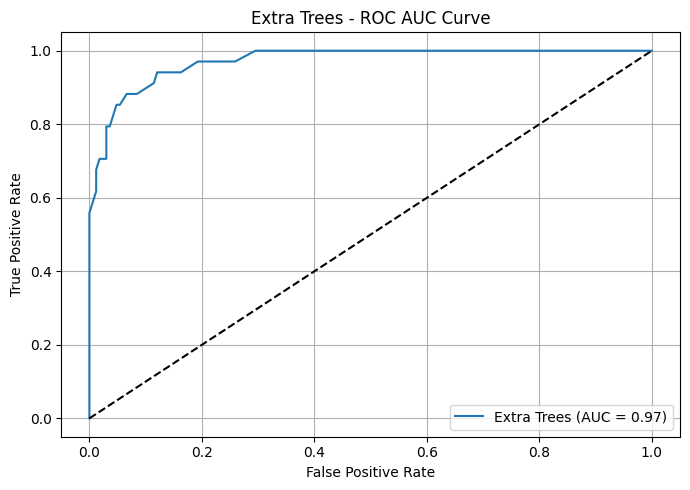


🔍 Running GridSearchCV for Decision Tree...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Results:
  ✅ Accuracy: 0.9950
  ✅ F1 Score: 0.9851
  📈 CV Accuracy Mean: 0.9975
  📈 CV Accuracy Std: 0.0050
  🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       166
           1       1.00      0.97      0.99        34

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



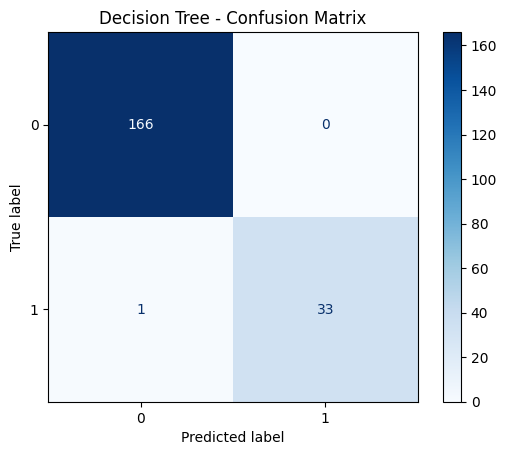

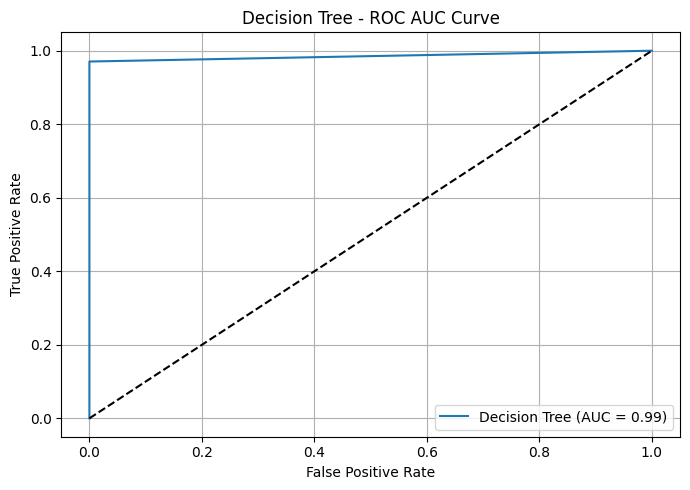


🔍 Running GridSearchCV for AdaBoost...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
AdaBoost Classification Results:
  ✅ Accuracy: 1.0000
  ✅ F1 Score: 1.0000
  📈 CV Accuracy Mean: 0.9963
  📈 CV Accuracy Std: 0.0057
  🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        34

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



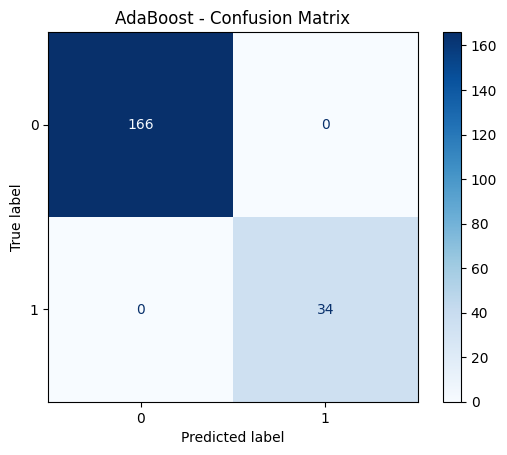

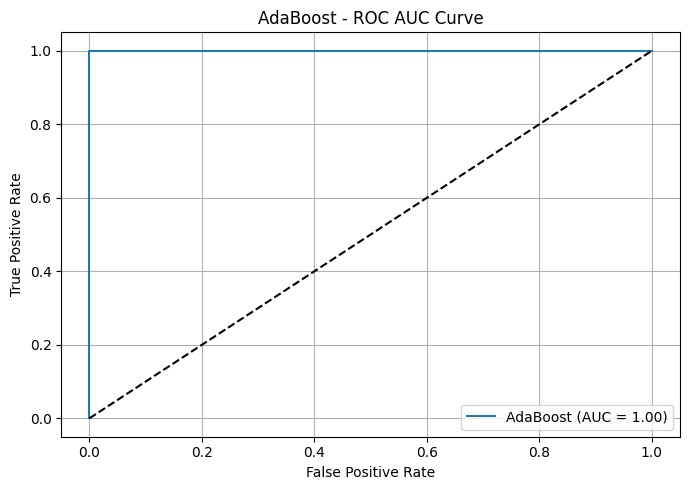


🔍 Running GridSearchCV for XGBoost...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Classification Results:
  ✅ Accuracy: 1.0000
  ✅ F1 Score: 1.0000
  📈 CV Accuracy Mean: 0.9988
  📈 CV Accuracy Std: 0.0037
  🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        34

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



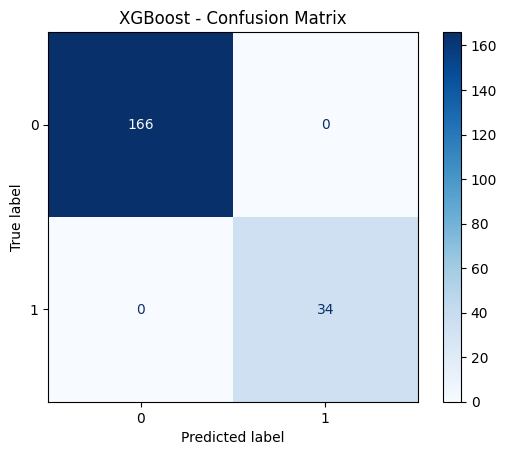

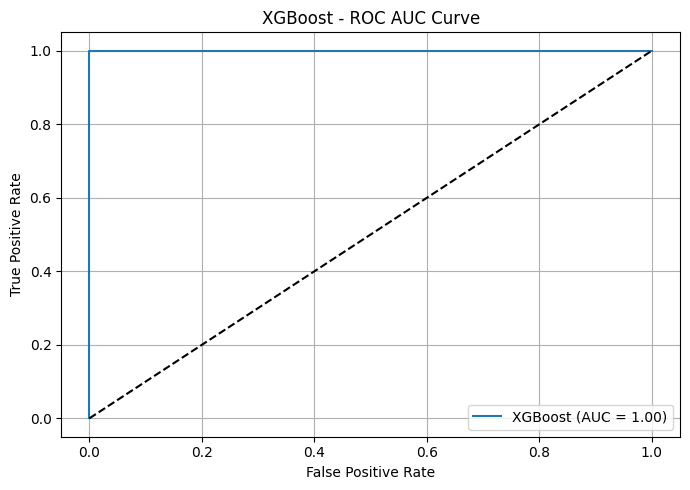


📌 Summary of Best Performing Models
✅ Best model by CV Accuracy: Gradient Boost (Accuracy = 0.9988)
✅ Best model by Test Accuracy: Gradient Boost (Accuracy = 1.0000)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns

#  Model Definitions
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}

#  Expanded Hyperparameter Grids
param_grid = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Gradient Boost": {
        'n_estimators': [100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    },
    "Extra Trees": {
        'n_estimators': [100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'criterion': ['gini', 'entropy']
    },
    "AdaBoost": {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1, 0.5]
    },
    "XGBoost": {
        'n_estimators': [100],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

#  Training, Evaluation, and Cross-Validation
best_cv_score = 0
best_test_score = 0
best_cv_model = ""
best_test_model = ""

for name, model in models.items():
    print(f"\n🔍 Running GridSearchCV for {name}...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid[name],
        cv=3,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]  # For ROC AUC
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, average='binary')

    cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='accuracy')
    cv_mean = cv_scores.mean()

    if cv_mean > best_cv_score:
        best_cv_score = cv_mean
        best_cv_model = name

    if test_accuracy > best_test_score:
        best_test_score = test_accuracy
        best_test_model = name

    print(f"✅ Best Params: {best_params}")
    print(f"{name} Classification Results:")
    print(f"  ✅ Accuracy: {test_accuracy:.4f}")
    print(f"  ✅ F1 Score: {test_f1:.4f}")
    print(f"  📈 CV Accuracy Mean: {cv_mean:.4f}")
    print(f"  📈 CV Accuracy Std: {cv_scores.std():.4f}")
    print("  🔍 Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC AUC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC AUC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 5: Summary
print("\n📌 Summary of Best Performing Models")
print(f"✅ Best model by CV Accuracy: {best_cv_model} (Accuracy = {best_cv_score:.4f})")
print(f"✅ Best model by Test Accuracy: {best_test_model} (Accuracy = {best_test_score:.4f})")

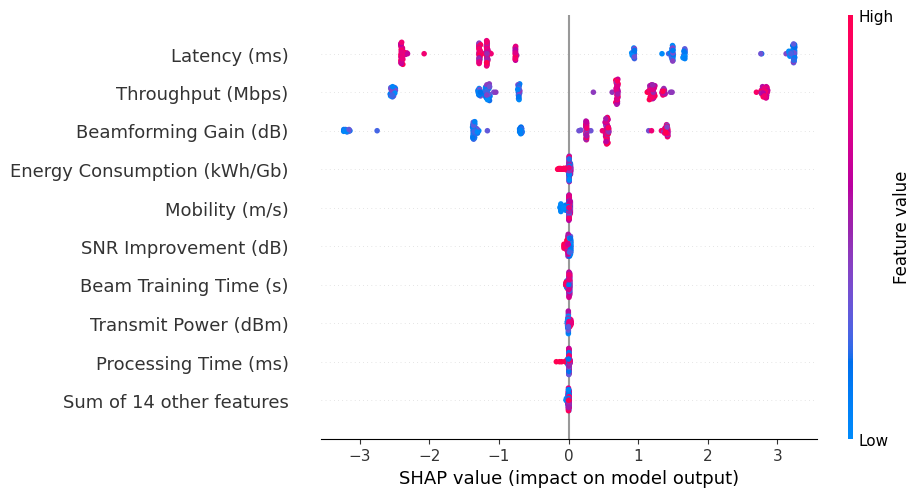

In [ ]:
import shap

# Refit best classifier on full training set
best_model.fit(X_train, y_train)

# Use TreeExplainer for tree-based models
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Visualize important features
shap.plots.beeswarm(shap_values)

In [ ]:
!pip install lime

🔍 SHAP Explanation Starting...

📊 SHAP Summary Plot (Global Importance):


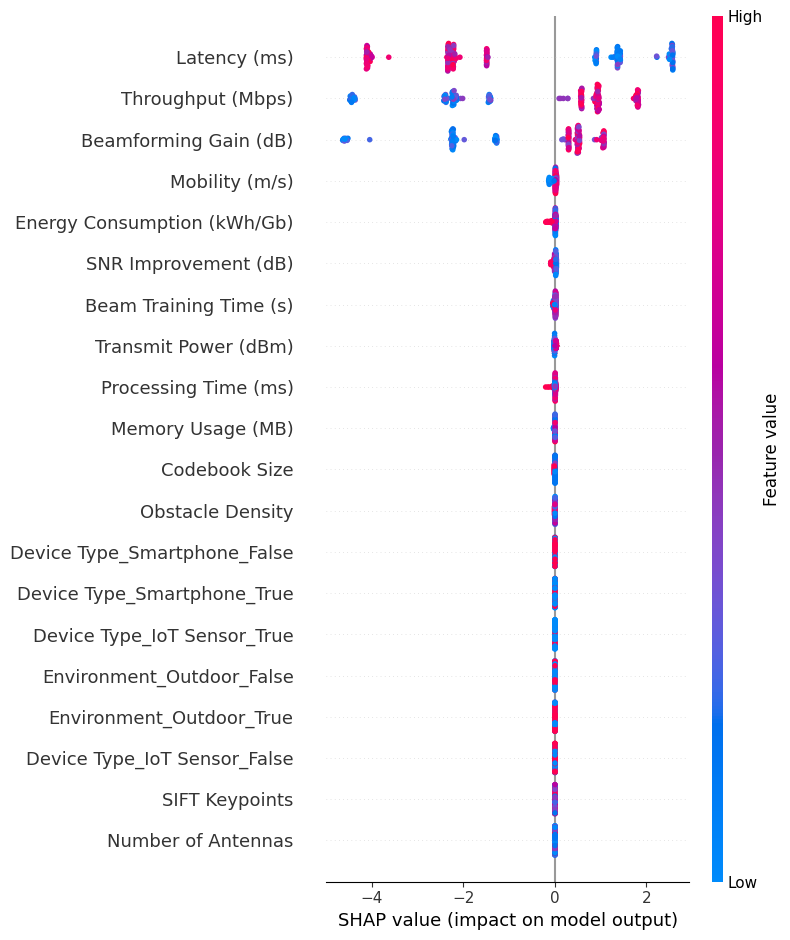



📊 SHAP Force Plot (Sample 0, Class 1 if available):




🔍 LIME Explanation (Sample 0):




📊 Tree-Based Feature Importances:


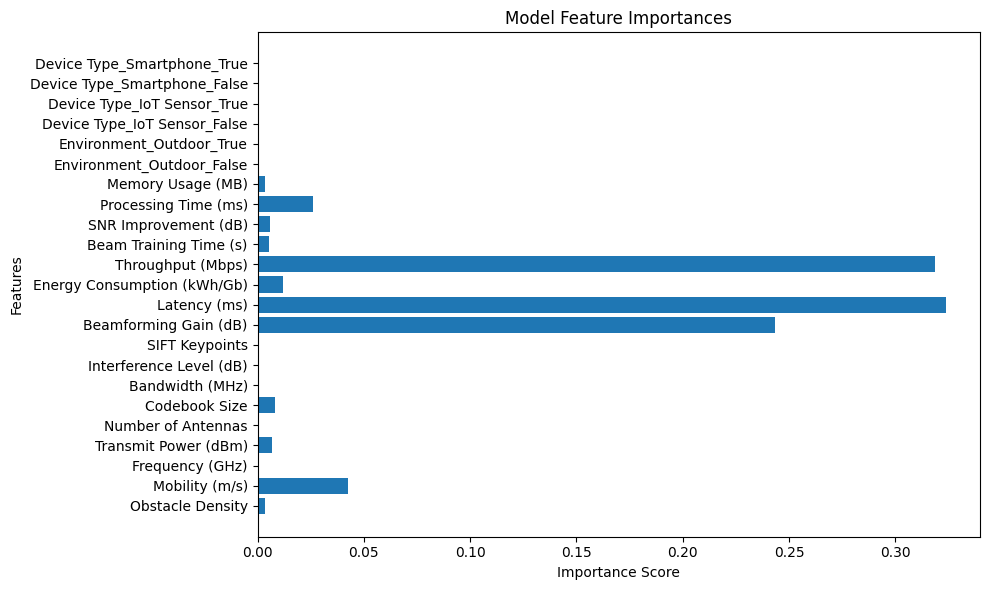

In [ ]:
import shap
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
from IPython.display import display

# === SHAP Explanation (Tree-based Models like XGBoost, RF, AdaBoost) ===
print("🔍 SHAP Explanation Starting...\n")

# Use TreeExplainer if supported
explainer_shap = shap.TreeExplainer(best_model)
shap_values = explainer_shap.shap_values(X_test)

# Summary Plot (Global Feature Importance)
print("📊 SHAP Summary Plot (Global Importance):")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.show()

# Add visual separation
print("\n" + "="*60 + "\n")

# Force Plot (Sample-wise Explanation for Class 1)
print("📊 SHAP Force Plot (Sample 0, Class 1 if available):")
shap.initjs()

if isinstance(shap_values, list):
    class_idx = 1 if len(shap_values) > 1 else 0
    display(shap.force_plot(
        explainer_shap.expected_value[class_idx],
        shap_values[class_idx][0],
        X_test.iloc[0]
    ))
else:
    display(shap.force_plot(
        explainer_shap.expected_value,
        shap_values[0],
        X_test.iloc[0]
    ))

# Add visual separation
print("\n" + "="*60 + "\n")

# === LIME Explanation (Model-Agnostic, Sample-Level) ===
print("🔍 LIME Explanation (Sample 0):")
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["Not Optimized", "Optimized"],
    mode='classification'
)

sample_index = 0
lime_exp = lime_explainer.explain_instance(
    X_test.iloc[sample_index].values,
    best_model.predict_proba,
    num_features=10
)
lime_exp.show_in_notebook(show_table=True)

# Add visual separation
print("\n" + "="*60 + "\n")

# === Feature Importance Bar Plot (Tree-based models) ===
print("📊 Tree-Based Feature Importances:")
importances = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances)
plt.title("Model Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()